In [14]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

from hamiltonian import Hamiltonian
from qiskit_example import estimators

In [2]:
h2_jw_4 = Hamiltonian('H2_STO3g_4qubits', 'jw')
h2_jw = Hamiltonian('H2_6-31G_8qubits', 'jw')

In [3]:
ham = h2_jw_4
pr = ham.pauli_rep
β = pr.local_dists_optimal('diagonal', 'lagrange')

gd_energy, gd_state = pr.ground()

variance = pr.variance_local(gd_energy, gd_state, β)

In [9]:
# each estimator is composed of S samples. We then run many trials for normal distribution
trials, samples = 100, 100

In [4]:
ests = estimators(trials, samples, pr, β, gd_state)

In [5]:
def histogram(ests, gd_energy, variance, samples):
    sigma = np.sqrt(variance/samples)
    x_min = gd_energy - 3*sigma
    x_max = gd_energy + 3*sigma
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x, gd_energy, sigma)
    plt.plot(x,y)
    plt.hist(ests, 10, density=1, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.show()

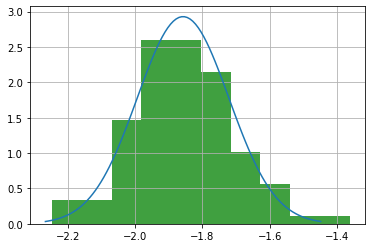

In [15]:
histogram(ests, gd_energy, variance, samples)